<a href="https://colab.research.google.com/github/indmind/2141720003-pcvk-2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


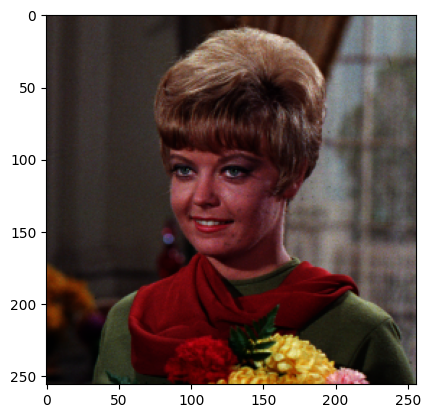

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_bgr = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/female.tiff')
img = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)
plt.imshow(img)

## 1. Buat Gamma Correction sesuai dengan petunjuk berikut

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

In [4]:
gamma = 3

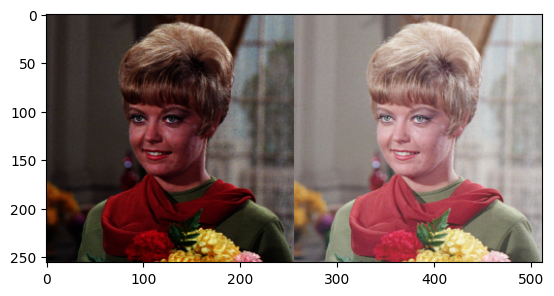

In [11]:
# l' = 255(l\255)^1/y

img_corrected = np.uint8(255 * np.power(img / 255, 1 / gamma));

plt.imshow(cv.hconcat((img, img_corrected)))

## 2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (0000000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, ds
t.

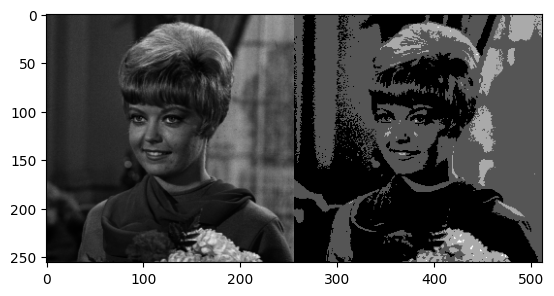

In [29]:
img_gray = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/female.tiff', cv.IMREAD_GRAYSCALE)
img_gray = cv.cvtColor(img_gray, cv.COLOR_BGR2RGB)
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
depth_image = np.zeros(img_gray.shape, img_gray.dtype)

for y in range(img_gray.shape[0]):
  for x in range(img_gray.shape[1]):
    depth_image[y][x] = np.round(img_gray[y][x] / level) * level

plt.imshow(cv.hconcat((img_gray, depth_image)))

## 3. Buat modul Average Denoising
Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).

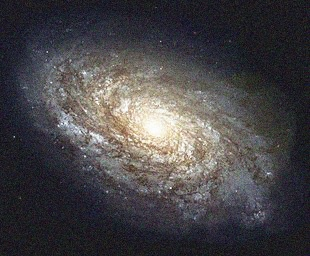

5 images
psnr modul: 27.539467779657713
psnr cv: 19.524735346302478


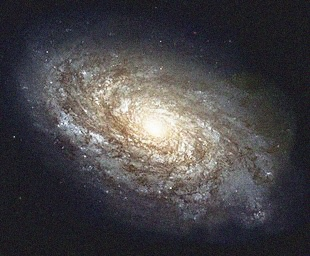

10 images
psnr modul: 27.550532023132245
psnr cv: 19.72956497093731


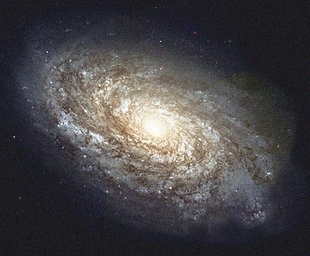

20 images
psnr modul: 27.526318031460857
psnr cv: 19.837387959217423


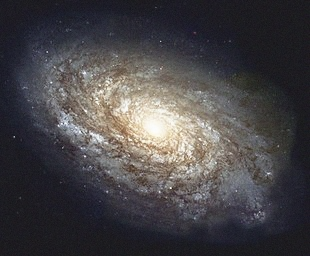

40 images
psnr modul: 27.44658888639406
psnr cv: 19.892080133121294


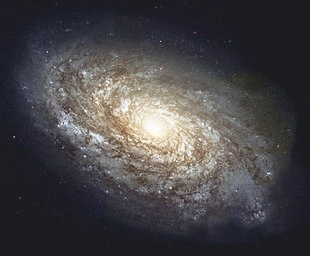

80 images
psnr modul: 27.413978659373658
psnr cv: 19.91739011108716


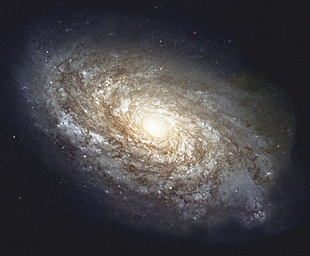

100 images
psnr modul: 27.370931279516654
psnr cv: 19.92196095594035


In [90]:
import glob

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Semester 5/pcvk/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

galaxy = cv.imread('/content/drive/MyDrive/Semester 5/pcvk/galaxy.jpg')

cv_img = np.array(cv_img)

avg_5 = np.uint8(np.mean(cv_img[:5], axis=0))

# plt.imshow(avg_5)

from math import log10, sqrt

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0): # MSE 0 maka tidak ada noise sam a sekali, sehingga PSNR tidak memiliki arti
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr

avgs = [5, 10, 20, 40, 80, 100]

for i in avgs:
  avg = np.uint8(np.mean(cv_img[:i], axis=0))
  psnr = PSNR(galaxy, avg)
  psnrcv = cv.PSNR(galaxy, avg)
  cv2_imshow(avg)
  print(f"{i} images\npsnr modul: {psnr}\npsnr cv: {psnrcv}")


Dari hasil percobaan di atas, terdapat perbedaan ketika menggunakan rumus PSNR dari modul dan dari library opencv, dimana jika menggunakan rumus dari modul, hasilnya terlihat tidak konsisten. Yang mana hasil terbaik diperoleh dengan melakukan averaging terhadap 20 gambar. Sedangkan hasil yang lebih konsisten didapat ketika menggunakan fungsi PSNR dari modul opencv, yang mana hasil terbaik diperoleh dengan melakukan average denoising dengan 100 image.

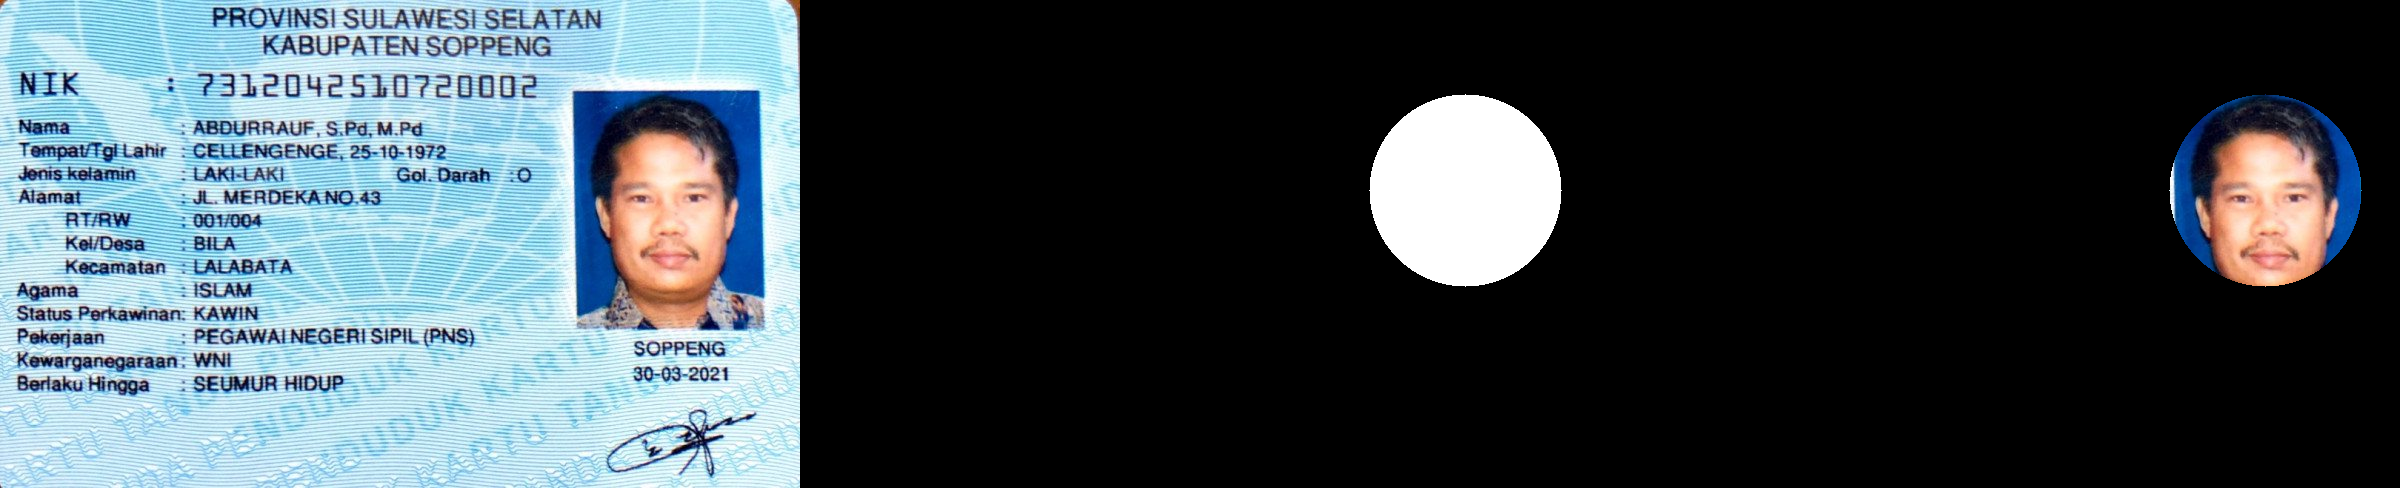

In [99]:
path='/content/drive/MyDrive/Semester 5/pcvk/ktp.jpeg'
KTP=cv.imread(path)
mask = np.zeros_like(KTP)

center1 = (665, 190)
radius1 = 96

cv.circle(mask, center1, radius1, (255, 255, 255), -1)
masked_image = cv.bitwise_and(KTP, mask)

final_frame = cv.hconcat((KTP,mask,masked_image))
cv2_imshow(final_frame)

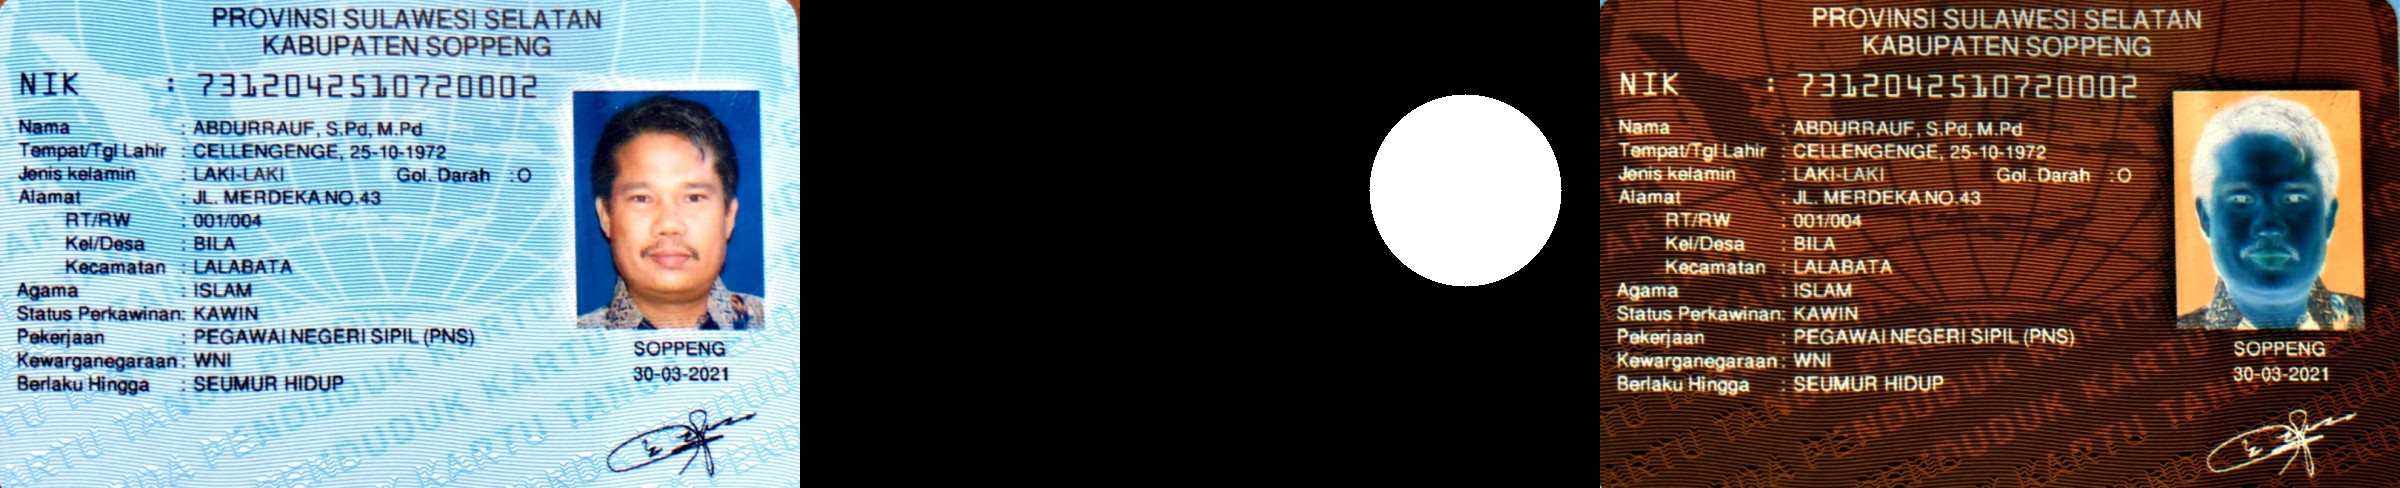

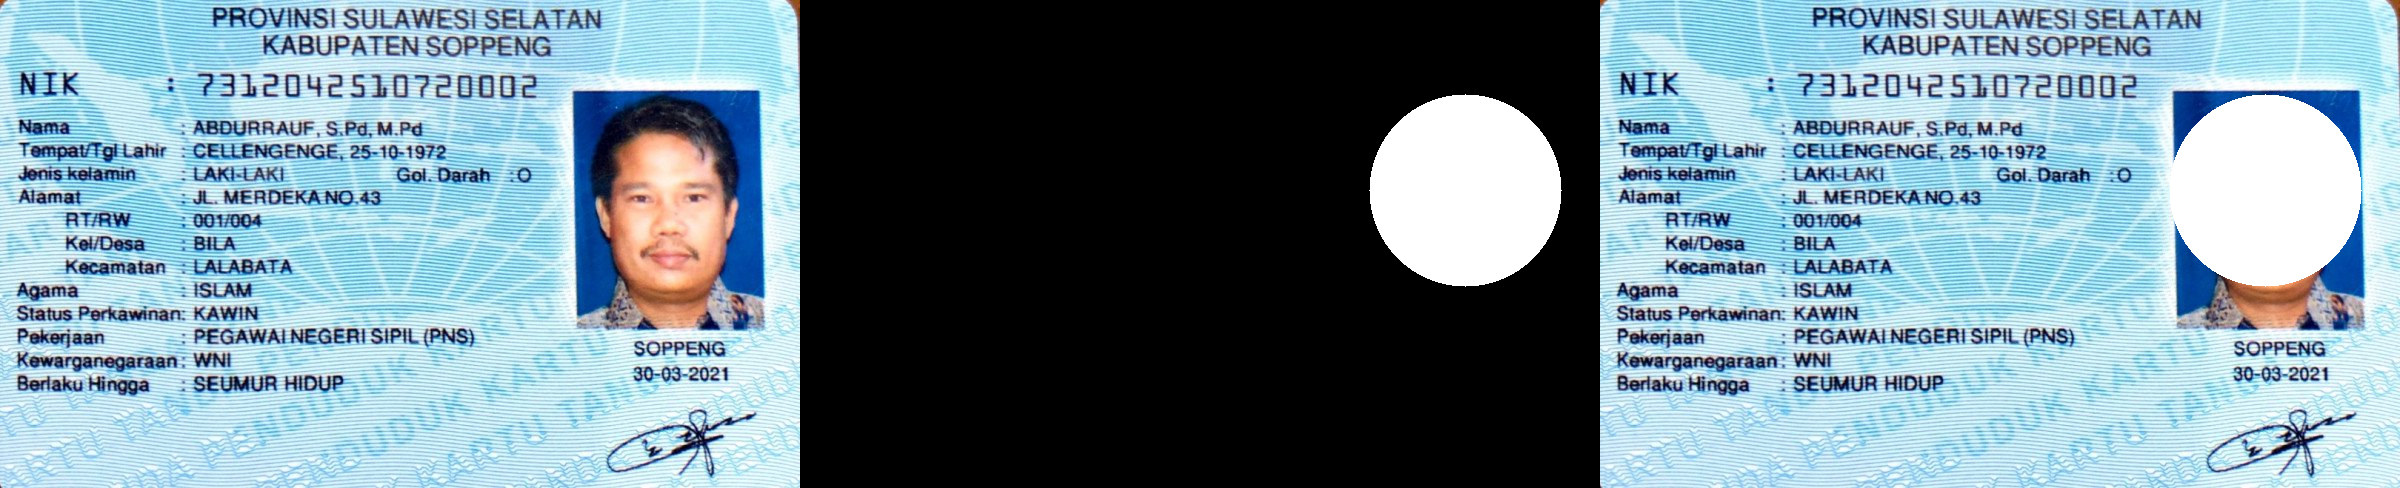

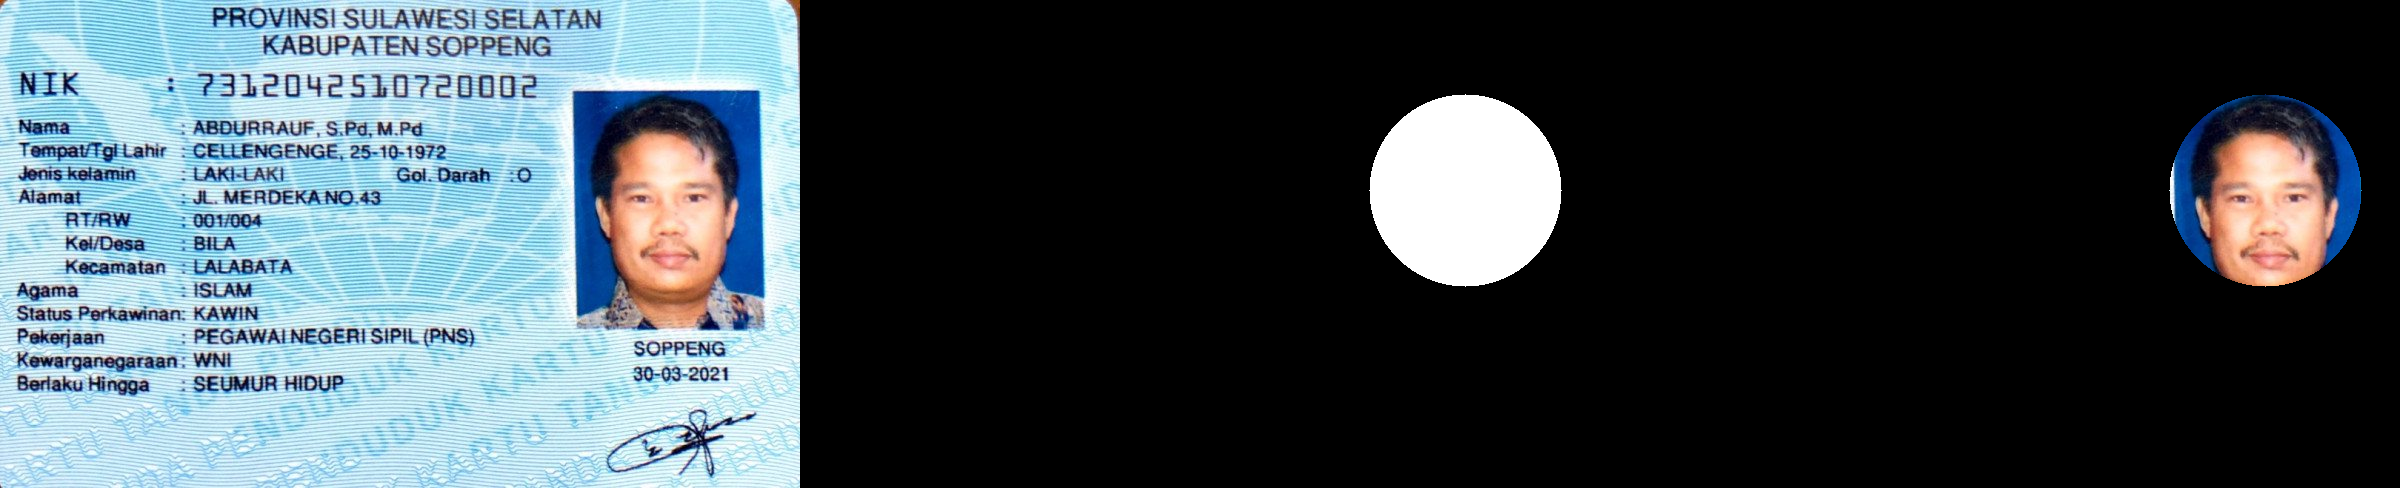

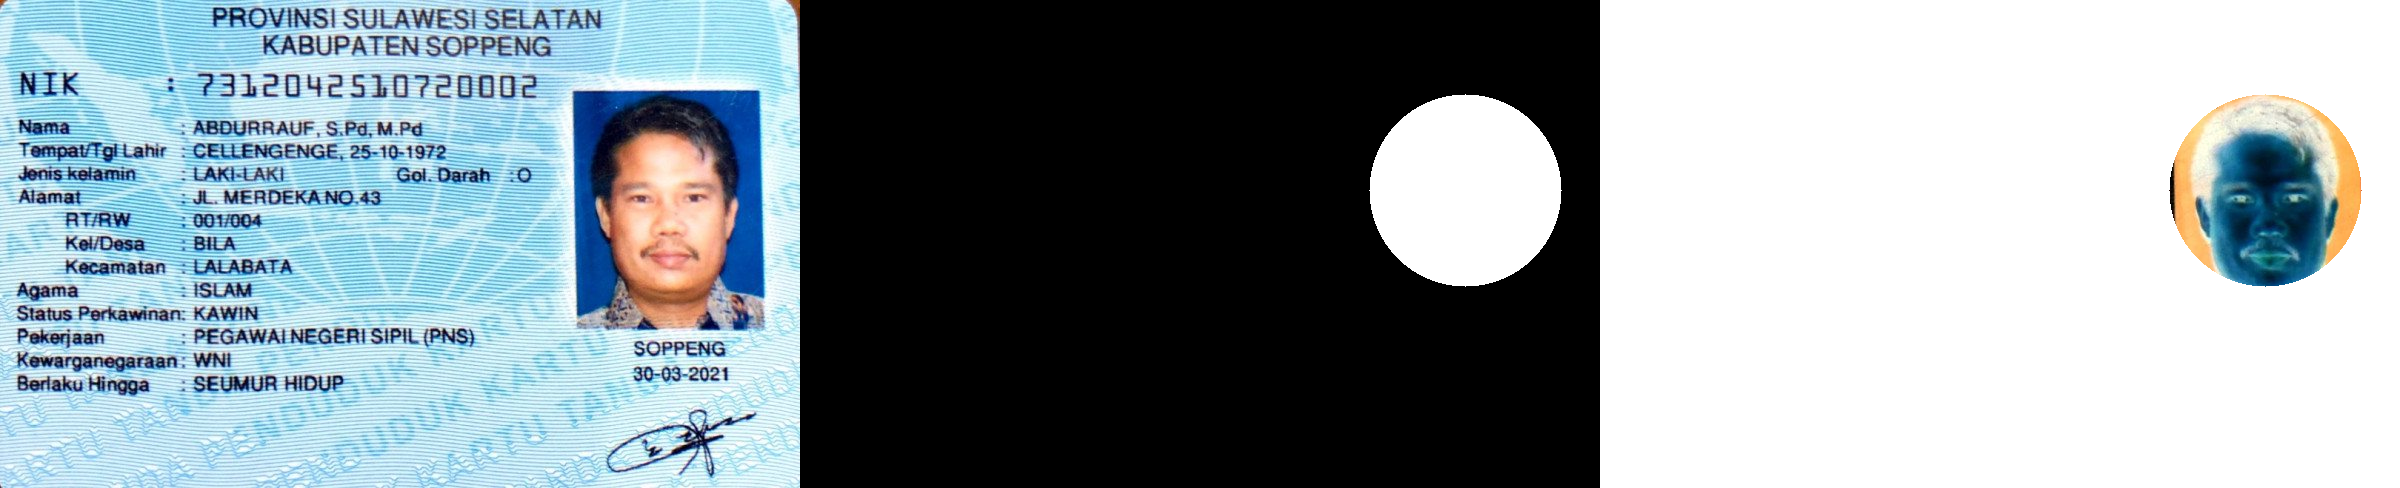

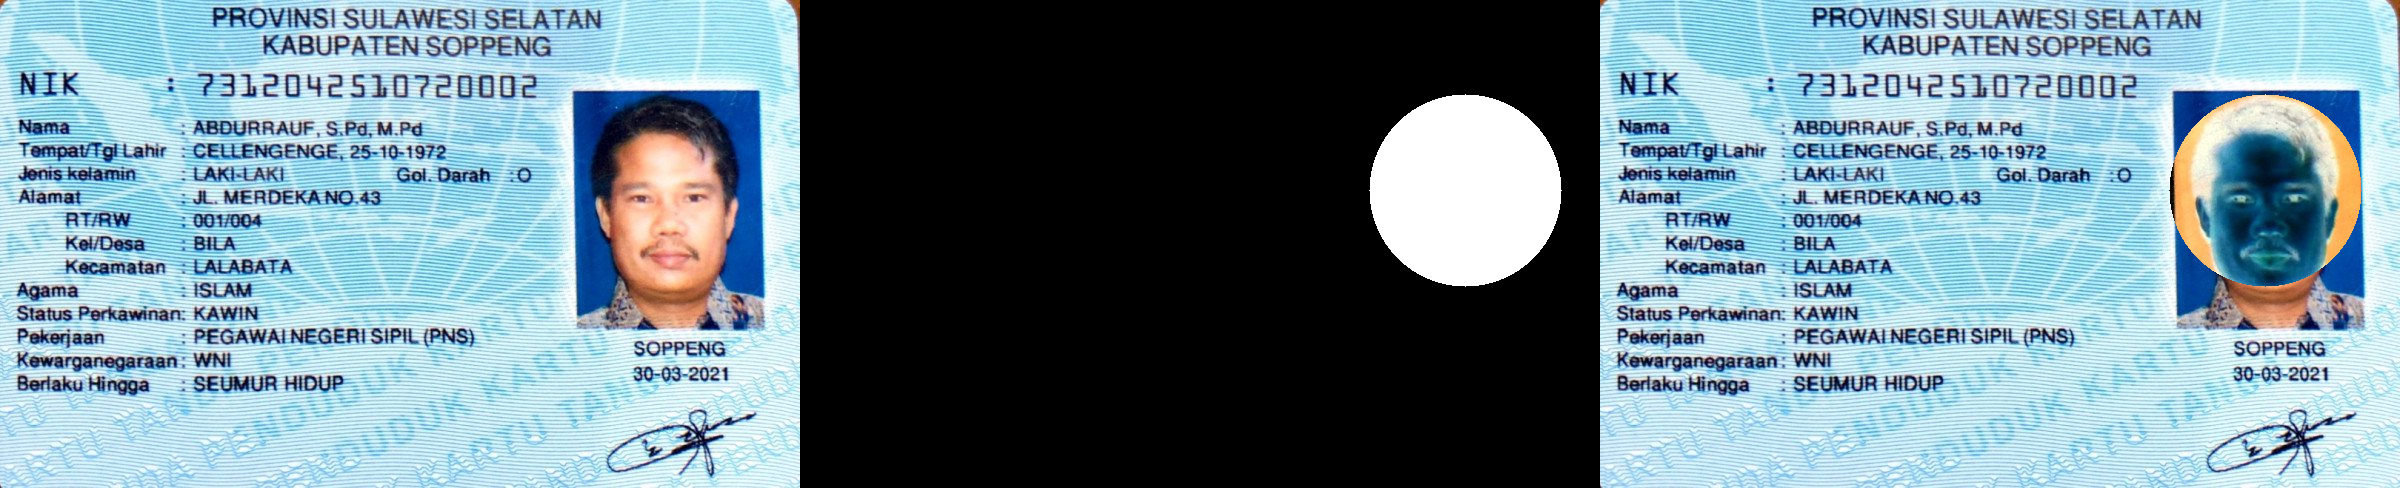

In [103]:
# not, or, and, nand, xor
inot = ~KTP
ior = KTP | mask
iand = KTP & mask
inand = ~(KTP & mask)
ixor = KTP ^ mask

cv2_imshow(cv.hconcat((KTP, mask, inot)))
cv2_imshow(cv.hconcat((KTP, mask, ior)))
cv2_imshow(cv.hconcat((KTP, mask, iand)))
cv2_imshow(cv.hconcat((KTP, mask, inand)))
cv2_imshow(cv.hconcat((KTP, mask, ixor)))